# Machine Learning Technologies - Lab 1
## Data Handling and Visualisation Fundamentals

**Objectives:**
1. Learn to load and manipulate data with pandas
2. Visualise data with matplotlib
3. Work with images as numpy arrays
4. Get familiar with basic scikit-learn workflows

**Prerequisites:** Basic Python, numpy knowledge

---


## 1. NumPy refresher

NumPy arrays are the foundation of scientific Python.


In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3, 4, 5])
print(a, a.shape, a.dtype)
b = np.array([[1,2,3,4],[1,2,3,4]])
print(b, b.shape, b.dtype)


[1 2 3 4 5] (5,) int64
[[1 2 3 4]
 [1 2 3 4]] (2, 4) int64


In [3]:
c = np.ones([3,3])
print(c)
d = np.arange(1,5)
print(d)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[1 2 3 4]



### Student Task

Create a 3×4 NumPy array containing the values 0–11.


In [4]:

# TODO: create array
e = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])

# TODO: print array and shape
print(e, e.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] (3, 4)


## Working with Pandas

Pandas is the standard library for data manipulation in Python. It provides two main data structures:
- **Series**: 1D labelled array
- **DataFrame**: 2D labelled data structure (like a spreadsheet)

Let's start by importing the libraries we'll need:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)



## Pandas introduction

Pandas provides labelled, tabular data structures.

Before continuing, skim:
https://pandas.pydata.org/docs/user_guide/10min.html

One of the restrictions of numpy arrays is that everything must be of the same data type, Pandas does not have this issue


In [6]:

data = {
    "name": ["Alice", "Bob", "Charlie", "Diana"],
    "age": [21, 23, 22, 24],
    "grade": [68, 75, 82, 90]
}

df = pd.DataFrame(data)
df


,name,age,grade
0,Alice,21,68
1,Bob,23,75
2,Charlie,22,82
3,Diana,24,90


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   age     4 non-null      int64 
 2   grade   4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


We can select an individual column using df["name"], this will return a series

If we want to convert this to a numpy array use .values

In [8]:
print(df["name"])
print("now as array:")
print(df["name"].values)

0      Alice
1        Bob
2    Charlie
3      Diana
Name: name, dtype: object
now as array:
['Alice' 'Bob' 'Charlie' 'Diana']



### Student Task

- Select the `age` column  
- Select `name` and `grade` together  
- Filter rows where `grade >= 75`


In [9]:
## todo
print(df["age"])
print(df[["name", "grade"]])
print(df[df['grade'] >= 75])

0    21
1    23
2    22
3    24
Name: age, dtype: int64
      name  grade
0    Alice     68
1      Bob     75
2  Charlie     82
3    Diana     90
      name  age  grade
1      Bob   23     75
2  Charlie   22     82
3    Diana   24     90



## Visualisation


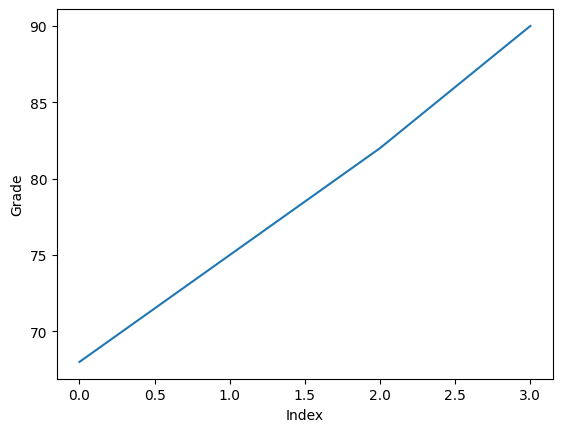

In [10]:

plt.plot(df["grade"])
plt.xlabel("Index")
plt.ylabel("Grade")
plt.show()



### Student Task

Create a bar chart of names vs grades.

(You could use plt.bar or df.plot(kind='bar'))


<BarContainer object of 4 artists>

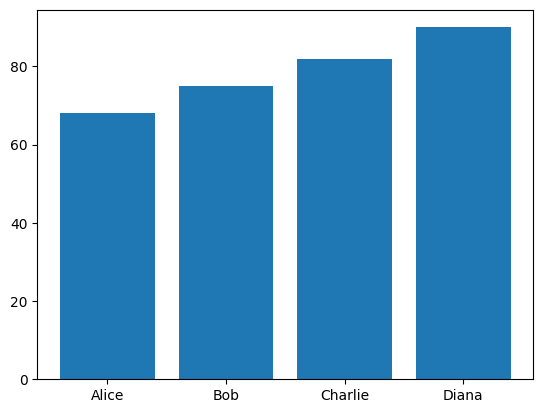

In [11]:
# TODO
plt.bar(df["name"], df["grade"])

### 1.1 Creating Sample Data

First, let's create some sample CSV and JSON files to work with:

In [12]:
# Create a sample CSV file - Student Grades
student_data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 
             'Frank', 'Grace', 'Henry', 'Iris', 'Jack'],
    'age': [20, 22, 21, 23, 20, 22, 21, 24, 20, 23],
    'math_score': [85, 72, 90, 88, 76, 95, 82, 79, 91, 84],
    'science_score': [78, 85, 88, 92, 81, 89, 87, 75, 94, 80],
    'attendance': [95, 87, 92, 98, 85, 97, 90, 82, 96, 88]
}

df_students = pd.DataFrame(student_data)
df_students.to_csv('students.csv', index=False)

print("Created students.csv")
print(df_students.head())

Created students.csv
   student_id     name  age  math_score  science_score  attendance
0           1    Alice   20          85             78          95
1           2      Bob   22          72             85          87
2           3  Charlie   21          90             88          92
3           4    Diana   23          88             92          98
4           5      Eve   20          76             81          85


In [13]:
# Create a sample JSON file - Weather Data
weather_data = {
    'city': ['Limerick', 'Galway', 'Dublin', 'Cork', 'Belfast'],
    'temperature': [12.5, 11.8, 13.2, 13.8, 10.9],
    'humidity': [82, 85, 78, 80, 88],
    'wind_speed': [15.2, 18.5, 12.3, 14.1, 20.3],
    'rainfall_mm': [2.3, 3.1, 1.8, 2.0, 3.8]
}

df_weather = pd.DataFrame(weather_data)
df_weather.to_json('weather.json', orient='records', indent=2)

print("Created weather.json")
print(df_weather)

Created weather.json
       city  temperature  humidity  wind_speed  rainfall_mm
0  Limerick         12.5        82        15.2          2.3
1    Galway         11.8        85        18.5          3.1
2    Dublin         13.2        78        12.3          1.8
3      Cork         13.8        80        14.1          2.0
4   Belfast         10.9        88        20.3          3.8


### 1.2 Loading Data

Now let's load these files and explore them:

In [14]:
# Load CSV file
students_df = pd.read_csv('students.csv')

print("First few rows:")
print(students_df.head())

print("\nDataFrame info:")
print(students_df.info())

print("\nBasic statistics:")
print(students_df.describe())

First few rows:
   student_id     name  age  math_score  science_score  attendance
0           1    Alice   20          85             78          95
1           2      Bob   22          72             85          87
2           3  Charlie   21          90             88          92
3           4    Diana   23          88             92          98
4           5      Eve   20          76             81          85

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     10 non-null     int64 
 1   name           10 non-null     object
 2   age            10 non-null     int64 
 3   math_score     10 non-null     int64 
 4   science_score  10 non-null     int64 
 5   attendance     10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes
None

Basic statistics:
       student_id        age  math_score 

In [15]:
# Load JSON file
weather_df = pd.read_json('weather.json')

print("Weather DataFrame:")
print(weather_df)

print("\nColumn data types:")
print(weather_df.dtypes)

Weather DataFrame:
       city  temperature  humidity  wind_speed  rainfall_mm
0  Limerick         12.5        82        15.2          2.3
1    Galway         11.8        85        18.5          3.1
2    Dublin         13.2        78        12.3          1.8
3      Cork         13.8        80        14.1          2.0
4   Belfast         10.9        88        20.3          3.8

Column data types:
city            object
temperature    float64
humidity         int64
wind_speed     float64
rainfall_mm    float64
dtype: object


### 1.3 Data Wrangling

**Task 1:** Let's perform some common data manipulation tasks:

In [16]:
# Task 1a: Calculate average score for each student
students_df['average_score'] = (students_df['math_score'] + 
                                 students_df['science_score']) / 2

print("Students with average scores:")
print(students_df[['name', 'math_score', 'science_score', 'average_score']])

Students with average scores:
      name  math_score  science_score  average_score
0    Alice          85             78           81.5
1      Bob          72             85           78.5
2  Charlie          90             88           89.0
3    Diana          88             92           90.0
4      Eve          76             81           78.5
5    Frank          95             89           92.0
6    Grace          82             87           84.5
7    Henry          79             75           77.0
8     Iris          91             94           92.5
9     Jack          84             80           82.0


In [17]:
# Task 1b: Filter students with average > 85
high_performers = students_df[students_df['average_score'] > 85]

print(f"\nHigh performers (avg > 85): {len(high_performers)} students")
print(high_performers[['name', 'average_score']])


High performers (avg > 85): 4 students
      name  average_score
2  Charlie           89.0
3    Diana           90.0
5    Frank           92.0
8     Iris           92.5


In [18]:
# Task 1c: Group by age and calculate mean scores
age_groups = students_df.groupby('age').agg({
    'math_score': 'mean',
    'science_score': 'mean',
    'attendance': 'mean'
}).round(2)

print("\nAverage scores by age:")
print(age_groups)


Average scores by age:
     math_score  science_score  attendance
age                                       
20         84.0          84.33        92.0
21         86.0          87.50        91.0
22         83.5          87.00        92.0
23         86.0          86.00        93.0
24         79.0          75.00        82.0


**Task 2:** Handle missing data (we'll artificially create some):

In [19]:
# Introduce some missing values
students_with_missing = students_df.copy()
students_with_missing.loc[2, 'math_score'] = np.nan
students_with_missing.loc[5, 'science_score'] = np.nan
students_with_missing.loc[7, 'attendance'] = np.nan

print("DataFrame with missing values:")
print(students_with_missing)

print("\nMissing values per column:")
print(students_with_missing.isnull().sum())

DataFrame with missing values:
   student_id     name  age  math_score  science_score  attendance  \
0           1    Alice   20        85.0           78.0        95.0   
1           2      Bob   22        72.0           85.0        87.0   
2           3  Charlie   21         NaN           88.0        92.0   
3           4    Diana   23        88.0           92.0        98.0   
4           5      Eve   20        76.0           81.0        85.0   
5           6    Frank   22        95.0            NaN        97.0   
6           7    Grace   21        82.0           87.0        90.0   
7           8    Henry   24        79.0           75.0         NaN   
8           9     Iris   20        91.0           94.0        96.0   
9          10     Jack   23        84.0           80.0        88.0   

   average_score  
0           81.5  
1           78.5  
2           89.0  
3           90.0  
4           78.5  
5           92.0  
6           84.5  
7           77.0  
8           92.5  
9       

In [20]:
# Fill missing values with column mean
students_filled = students_with_missing.fillna(students_with_missing[["math_score","science_score","attendance"]].mean())

print("\nAfter filling with mean:")
print(students_filled)

# Alternatively, drop rows with missing values
students_dropped = students_with_missing.dropna()
print(f"\nRows after dropping NaN: {len(students_dropped)} (was {len(students_with_missing)})")
students_dropped


After filling with mean:
   student_id     name  age  math_score  science_score  attendance  \
0           1    Alice   20   85.000000      78.000000        95.0   
1           2      Bob   22   72.000000      85.000000        87.0   
2           3  Charlie   21   83.555556      88.000000        92.0   
3           4    Diana   23   88.000000      92.000000        98.0   
4           5      Eve   20   76.000000      81.000000        85.0   
5           6    Frank   22   95.000000      84.444444        97.0   
6           7    Grace   21   82.000000      87.000000        90.0   
7           8    Henry   24   79.000000      75.000000        92.0   
8           9     Iris   20   91.000000      94.000000        96.0   
9          10     Jack   23   84.000000      80.000000        88.0   

   average_score  
0           81.5  
1           78.5  
2           89.0  
3           90.0  
4           78.5  
5           92.0  
6           84.5  
7           77.0  
8           92.5  
9           8

,student_id,name,age,math_score,science_score,attendance,average_score
0,1,Alice,20,85.0,78.0,95.0,81.5
1,2,Bob,22,72.0,85.0,87.0,78.5
3,4,Diana,23,88.0,92.0,98.0,90.0
4,5,Eve,20,76.0,81.0,85.0,78.5
6,7,Grace,21,82.0,87.0,90.0,84.5
8,9,Iris,20,91.0,94.0,96.0,92.5
9,10,Jack,23,84.0,80.0,88.0,82.0


**Task 3:** Merge weather data with city information:

In [21]:
# Create city information
city_info = pd.DataFrame({
    'city': ['Limerick', 'Galway', 'Dublin', 'Cork', 'Belfast'],
    'population': [94192, 79934, 554554, 208669, 343542],
    'province': ['Munster', 'Connacht', 'Leinster', 'Munster', 'Ulster']
})

# Merge dataframes
weather_merged = pd.merge(weather_df, city_info, on='city')

print("Merged weather data:")
print(weather_merged)

Merged weather data:
       city  temperature  humidity  wind_speed  rainfall_mm  population  \
0  Limerick         12.5        82        15.2          2.3       94192   
1    Galway         11.8        85        18.5          3.1       79934   
2    Dublin         13.2        78        12.3          1.8      554554   
3      Cork         13.8        80        14.1          2.0      208669   
4   Belfast         10.9        88        20.3          3.8      343542   

   province  
0   Munster  
1  Connacht  
2  Leinster  
3   Munster  
4    Ulster  


### 1.4 Quick Exercise

**Your turn!** Complete the following tasks:

1. Calculate the temperature-to-humidity ratio for each city

   (dataframename["newcolumn"] = ....  creates a new column or overwrites the column if the column name already exists)  
3. Find the city with the highest rainfall
   
   (Boolean indexing might work here, if you don't know what that is, ask)
4. Create a new column categorising cities as 'Windy' (wind_speed > 15) or 'Calm'

   (np.where may work here like a ternary conditional OR use .apply)

In [22]:
# Exercise solution space
# 1. Temperature-to-humidity ratio
weather_merged["temperature_humidity_ratio"] = weather_merged["temperature"] / weather_merged["humidity"]

# 2. City with highest rainfall
print(weather_merged[weather_merged["rainfall_mm"] == weather_merged["rainfall_mm"].max()]["city"])

# 3. Wind category
weather_merged["category"] = np.where(weather_merged["wind_speed"] > 15, "Windy", "Calm")
weather_merged


4    Belfast
Name: city, dtype: object


,city,temperature,humidity,wind_speed,rainfall_mm,population,province,temperature_humidity_ratio,category
0,Limerick,12.5,82,15.2,2.3,94192,Munster,0.152439,Windy
1,Galway,11.8,85,18.5,3.1,79934,Connacht,0.138824,Windy
2,Dublin,13.2,78,12.3,1.8,554554,Leinster,0.169231,Calm
3,Cork,13.8,80,14.1,2.0,208669,Munster,0.172500,Calm
4,Belfast,10.9,88,20.3,3.8,343542,Ulster,0.123864,Windy


# Exercise Student Performance Analysis

In [23]:
# Using the students_df DataFrame:
#
# 1. Create a new column 'grade' based on average_score:
#    - 'A' if average_score >= 90
#    - 'B' if 85 <= average_score < 90
#    - 'C' if 80 <= average_score < 85
#    - 'D' if average_score < 80
# Again np.where may work but difficult to read, np.select may work better, .apply is also a possibility
#
# 2. Count how many students got each grade - don't write a loop
#
# 3. Find the student(s) with the highest attendance
#
# 4. Calculate the correlation between attendance and average_score
#    (hint: use .corr() method)
#
# 5. Create a new DataFrame with only students who:
#    - Have attendance > 90, AND
#    - Have average_score > 85
#    Display their names and scores

# Your code here:


## Some Exercises

people.csv and devices.json were given to you on Moodle

Load both of these files using pandas and investigate the dataframes

In [24]:
people_df = pd.read_csv('people.csv')
devices_df = pd.read_json('devices.json')

In [25]:
people_df 

,name,age,height_cm,city
0,Alice,23,165,Dublin
1,Bob,35,180,Galway
2,Charlie,29,175,Cork
3,Dana,41,160,Dublin


In [26]:
devices_df

,id,type,active,value
0,1,sensor,True,12.3
1,2,sensor,False,7.8
2,3,camera,True,NaN


## Part 2: Visualisation with Matplotlib

Matplotlib is the foundational plotting library in Python. Let's explore various plot types:

### 2.1 Basic Plots

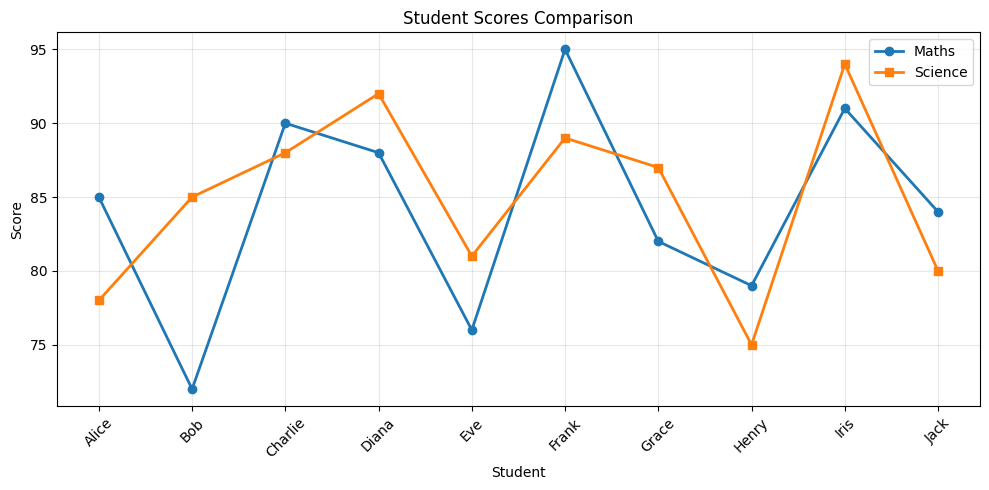

In [27]:
# Line plot - Student scores
plt.figure(figsize=(10, 5))
plt.plot(students_df['name'], students_df['math_score'], 
         marker='o', label='Maths', linewidth=2)
plt.plot(students_df['name'], students_df['science_score'], 
         marker='s', label='Science', linewidth=2)
plt.xlabel('Student')
plt.ylabel('Score')
plt.title('Student Scores Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

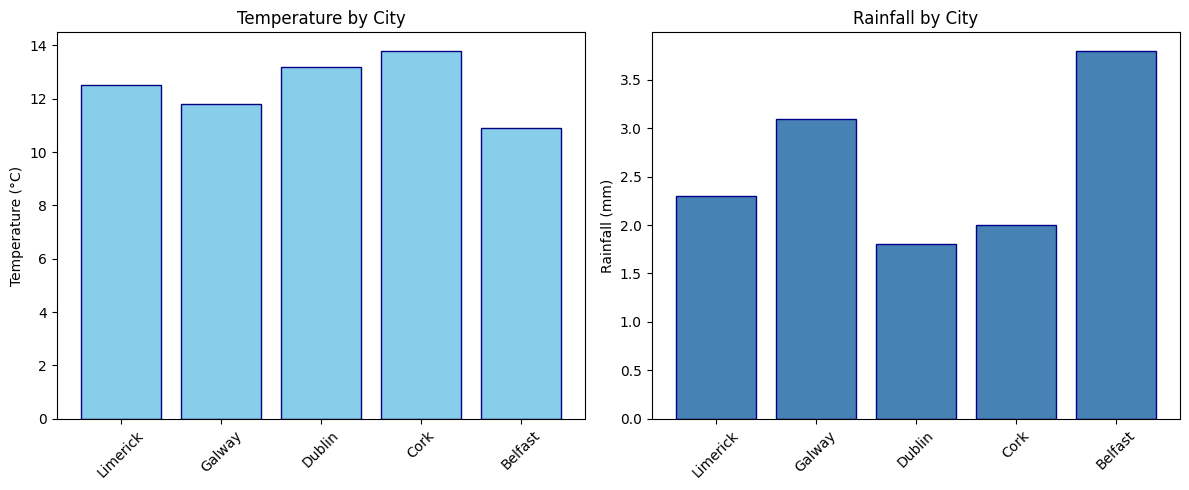

In [28]:
# Bar chart - Weather comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Temperature bar chart
axes[0].bar(weather_merged['city'], weather_merged['temperature'], 
            color='skyblue', edgecolor='navy')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature by City')
axes[0].tick_params(axis='x', rotation=45)

# Rainfall bar chart
axes[1].bar(weather_merged['city'], weather_merged['rainfall_mm'], 
            color='steelblue', edgecolor='darkblue')
axes[1].set_ylabel('Rainfall (mm)')
axes[1].set_title('Rainfall by City')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

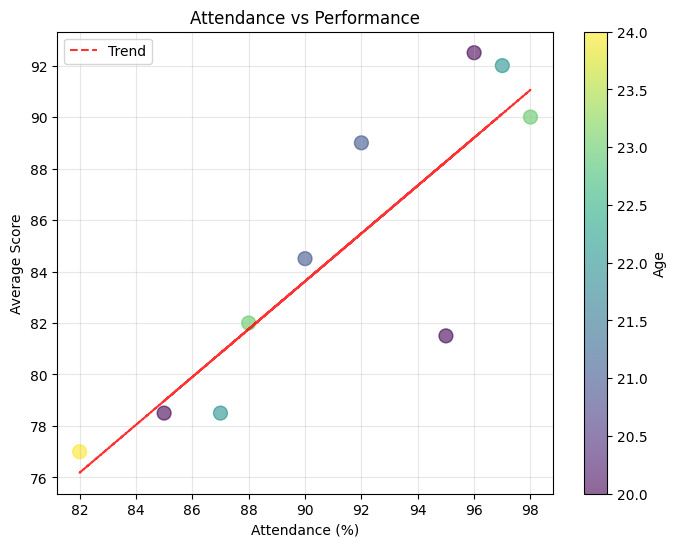

In [29]:
# Scatter plot with trend line
plt.figure(figsize=(8, 6))
plt.scatter(students_df['attendance'], students_df['average_score'], 
            s=100, alpha=0.6, c=students_df['age'], cmap='viridis')
plt.colorbar(label='Age')

# Add trend line
z = np.polyfit(students_df['attendance'], students_df['average_score'], 1)
p = np.poly1d(z)
plt.plot(students_df['attendance'], p(students_df['attendance']), 
         "r--", alpha=0.8, label='Trend')

plt.xlabel('Attendance (%)')
plt.ylabel('Average Score')
plt.title('Attendance vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

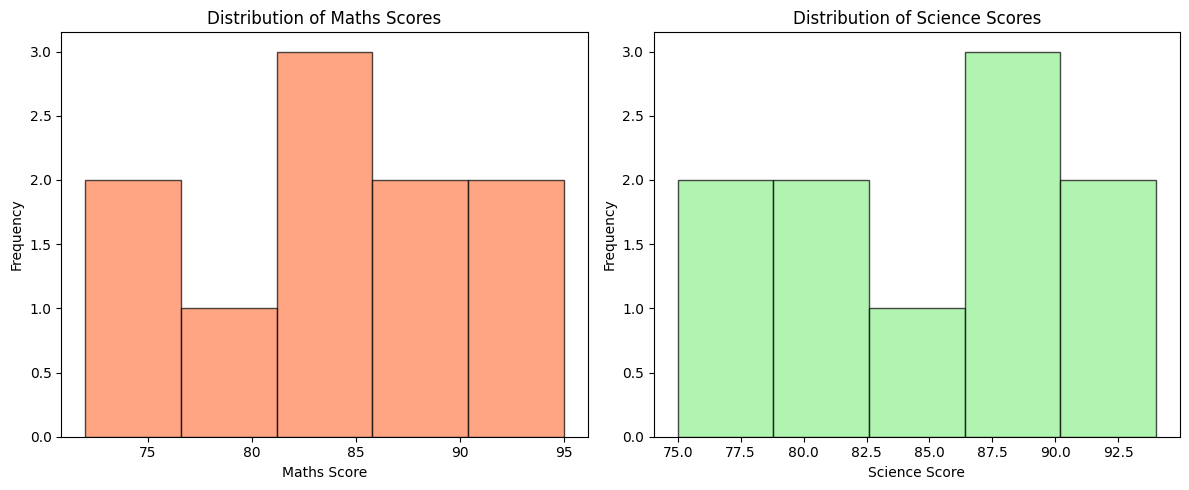

In [30]:
# Histogram - Score distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(students_df['math_score'], bins=5, 
             color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Maths Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Maths Scores')

axes[1].hist(students_df['science_score'], bins=5, 
             color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Science Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Science Scores')

plt.tight_layout()
plt.show()

### 2.2 Subplots and Multiple Visualisations

/var/folders/6x/6sqc801s2fq6_1yr261lgvy00000gn/T/ipykernel_5110/1894226309.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot([students_df['attendance'], students_df['math_score'],


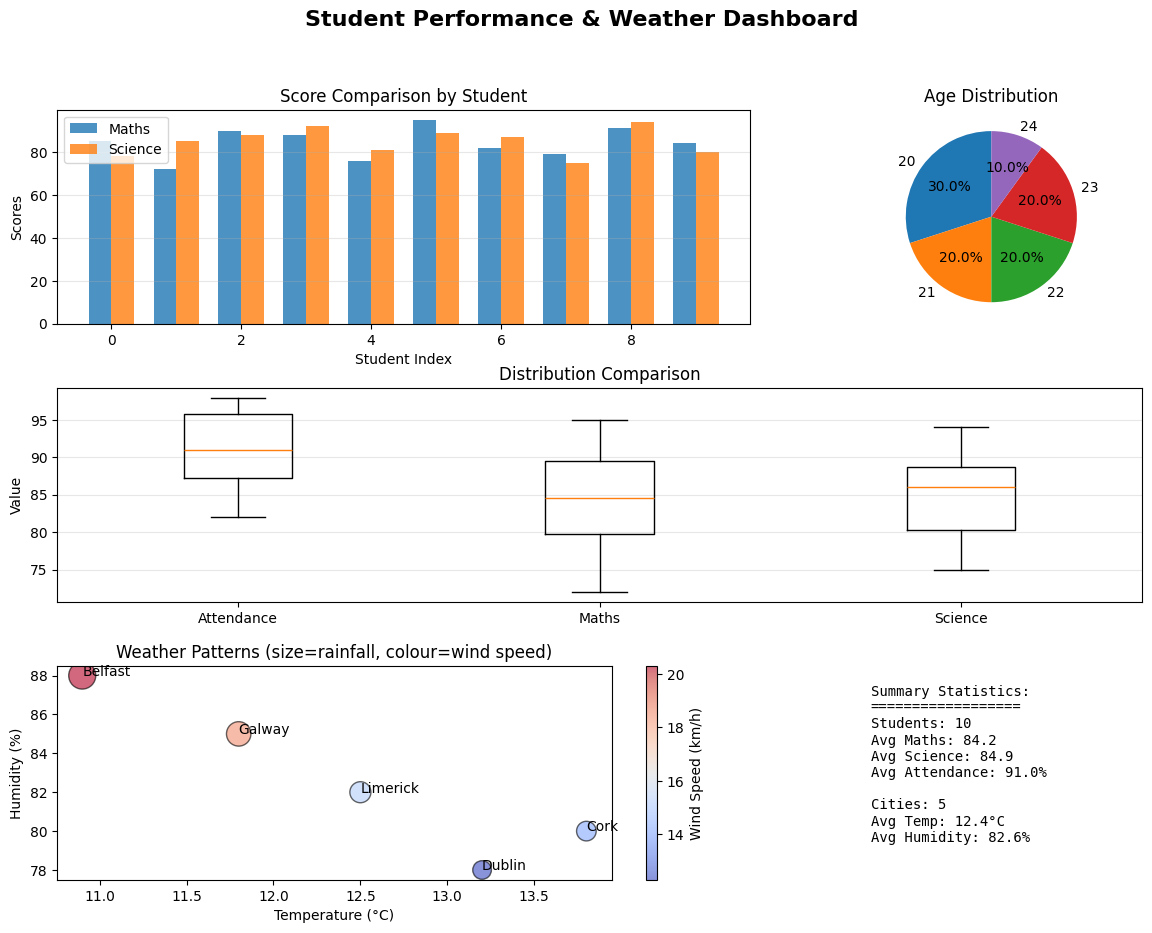

In [31]:
# Create a dashboard-style visualisation
fig = plt.figure(figsize=(14, 10))

# Define grid
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Score comparison (spans 2 columns)
ax1 = fig.add_subplot(gs[0, :2])
x = np.arange(len(students_df))
width = 0.35
ax1.bar(x - width/2, students_df['math_score'], width, label='Maths', alpha=0.8)
ax1.bar(x + width/2, students_df['science_score'], width, label='Science', alpha=0.8)
ax1.set_xlabel('Student Index')
ax1.set_ylabel('Scores')
ax1.set_title('Score Comparison by Student')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Age distribution
ax2 = fig.add_subplot(gs[0, 2])
age_counts = students_df['age'].value_counts().sort_index()
ax2.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Age Distribution')

# Plot 3: Attendance box plot
ax3 = fig.add_subplot(gs[1, :])
ax3.boxplot([students_df['attendance'], students_df['math_score'], 
             students_df['science_score']], 
            labels=['Attendance', 'Maths', 'Science'])
ax3.set_ylabel('Value')
ax3.set_title('Distribution Comparison')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Weather scatter
ax4 = fig.add_subplot(gs[2, :2])
scatter = ax4.scatter(weather_merged['temperature'], weather_merged['humidity'], 
                     s=weather_merged['rainfall_mm']*100, 
                     c=weather_merged['wind_speed'], 
                     cmap='coolwarm', alpha=0.6, edgecolors='black')
for i, city in enumerate(weather_merged['city']):
    ax4.annotate(city, (weather_merged['temperature'].iloc[i], 
                        weather_merged['humidity'].iloc[i]))
ax4.set_xlabel('Temperature (°C)')
ax4.set_ylabel('Humidity (%)')
ax4.set_title('Weather Patterns (size=rainfall, colour=wind speed)')
plt.colorbar(scatter, ax=ax4, label='Wind Speed (km/h)')

# Plot 5: Summary statistics
ax5 = fig.add_subplot(gs[2, 2])
ax5.axis('off')
summary_text = f"""Summary Statistics:
==================
Students: {len(students_df)}
Avg Maths: {students_df['math_score'].mean():.1f}
Avg Science: {students_df['science_score'].mean():.1f}
Avg Attendance: {students_df['attendance'].mean():.1f}%

Cities: {len(weather_merged)}
Avg Temp: {weather_merged['temperature'].mean():.1f}°C
Avg Humidity: {weather_merged['humidity'].mean():.1f}%
"""
ax5.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
         verticalalignment='center')

plt.suptitle('Student Performance & Weather Dashboard', fontsize=16, fontweight='bold')
plt.show()

## Exercise for matplotlib

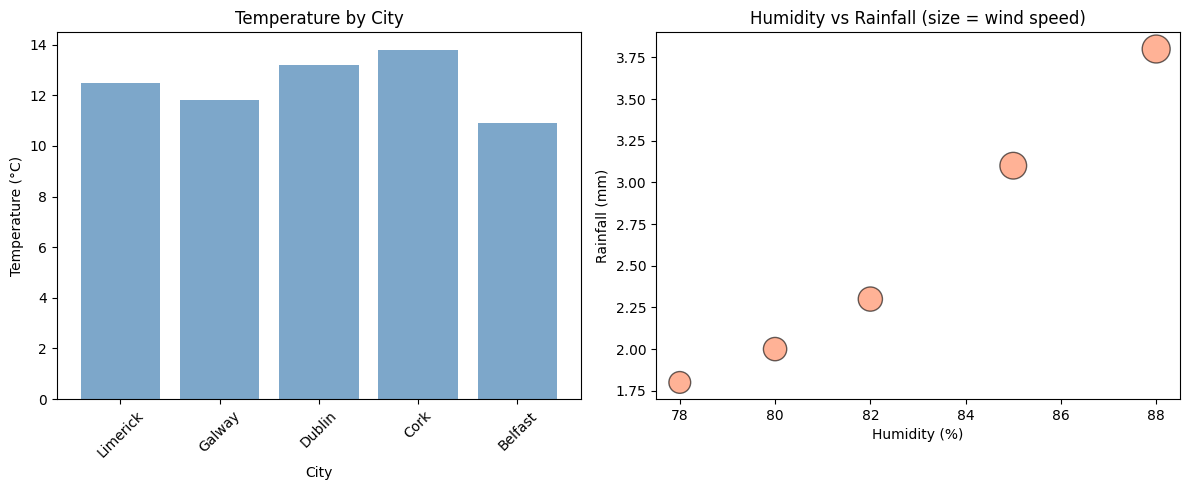

In [32]:
# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left subplot: Bar chart of temperature by city
ax1.bar(weather_merged['city'], weather_merged['temperature'], color='steelblue', alpha=0.7)
ax1.set_xlabel('City')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature by City')
ax1.tick_params(axis='x', rotation=45)

# Right subplot: Scatter plot with humidity vs rainfall, sized by wind speed
ax2.scatter(weather_merged['humidity'], weather_merged['rainfall_mm'], 
            s=weather_merged['wind_speed']*20, alpha=0.6, color='coral', edgecolors='black')
ax2.set_xlabel('Humidity (%)')
ax2.set_ylabel('Rainfall (mm)')
ax2.set_title('Humidity vs Rainfall (size = wind speed)')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

---
## Part 3: Working with Images

Images are simply arrays of numbers! Let's explore how to work with them:

### 3.1 Create Sample Images

In [33]:
from PIL import Image

# Create a simple RGB image using numpy
# Red gradient
red_image = np.zeros((200, 200, 3), dtype=np.uint8)
for i in range(200):
    red_image[:, i] = [i, 0, 0]  # RGB format

# Blue gradient
blue_image = np.zeros((200, 200, 3), dtype=np.uint8)
for i in range(200):
    blue_image[i, :] = [0, 0, i]

# Save using PIL
Image.fromarray(red_image).save('red_gradient.png')
Image.fromarray(blue_image).save('blue_gradient.png')

print("Created sample images: red_gradient.png and blue_gradient.png")
print(f"Red image shape: {red_image.shape}")
print(f"Data type: {red_image.dtype}")
print(f"Value range: [{red_image.min()}, {red_image.max()}]")

Created sample images: red_gradient.png and blue_gradient.png
Red image shape: (200, 200, 3)
Data type: uint8
Value range: [0, 199]


### 3.2 Loading and Displaying Images

**Important Note:** PIL and OpenCV handle colours differently!
- **PIL/Matplotlib**: RGB (Red, Green, Blue)
- **OpenCV**: BGR (Blue, Green, Red)

As we are unable to import OpenCV on the lab machines, I have replaced that with simulating OpenCV's behaviour

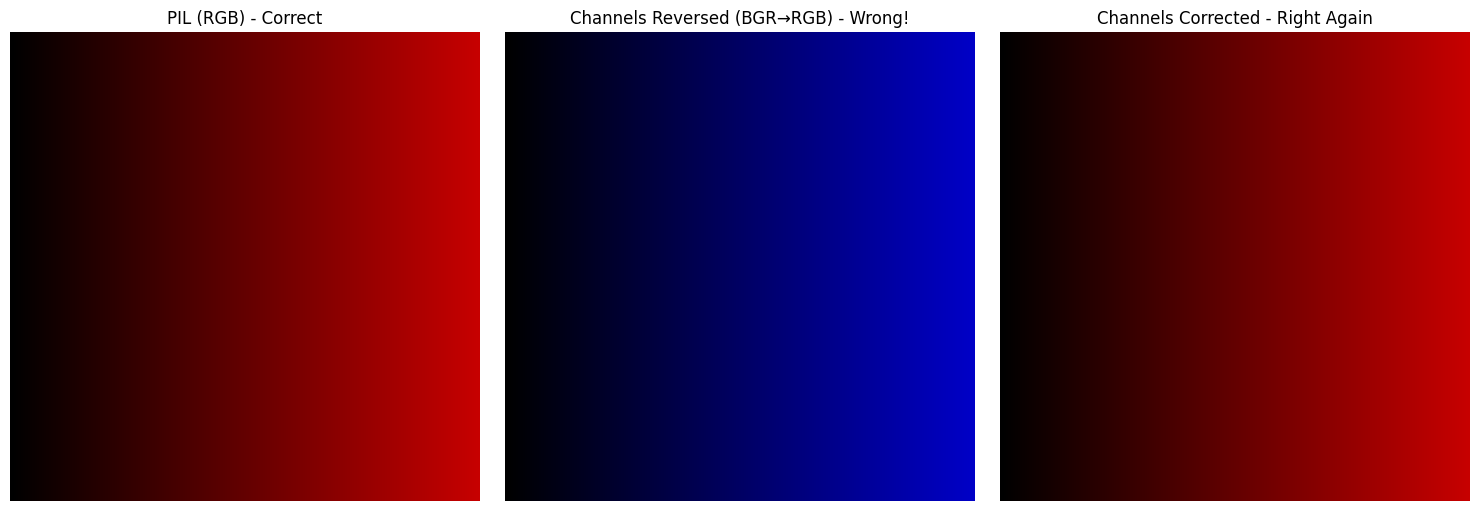

Notice how the middle image looks wrong!
When channels are in wrong order: blue appears red, red appears blue

Important: Different libraries use different channel orders:
  • PIL/Matplotlib: RGB
  • OpenCV: BGR
  • Always check documentation!


In [34]:
from PIL import Image

# Load image with PIL
pil_image = Image.open('red_gradient.png')
pil_array = np.array(pil_image)

# Create a "fake BGR" version by swapping channels manually
# This simulates what OpenCV does
bgr_array = pil_array[:, :, ::-1]  # Reverse the channel order

# Compare
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(pil_array)
axes[0].set_title('PIL (RGB) - Correct')
axes[0].axis('off')

axes[1].imshow(bgr_array)
axes[1].set_title('Channels Reversed (BGR→RGB) - Wrong!')
axes[1].axis('off')

# Fix by reversing again
bgr_to_rgb = bgr_array[:, :, ::-1]
axes[2].imshow(bgr_to_rgb)
axes[2].set_title('Channels Corrected - Right Again')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Notice how the middle image looks wrong!")
print("When channels are in wrong order: blue appears red, red appears blue")
print("\nImportant: Different libraries use different channel orders:")
print("  • PIL/Matplotlib: RGB")
print("  • OpenCV: BGR")
print("  • Always check documentation!")

## Exercise, fix the colour space

Now try with the image 353.jpg

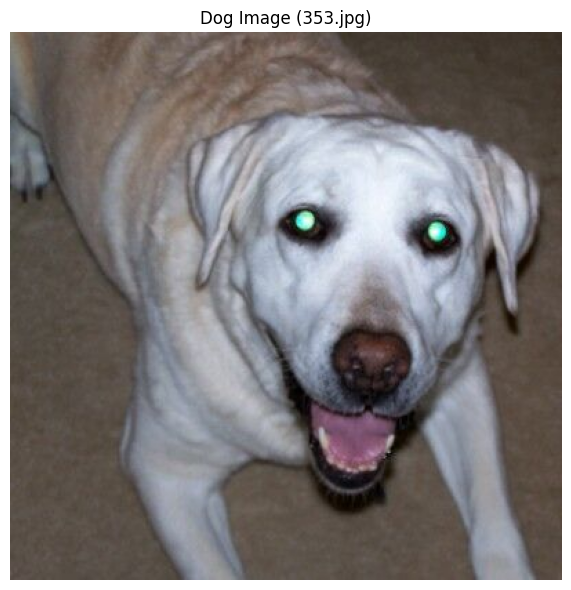

In [35]:
# Load image using PIL
img_dog = Image.open('353.jpg')
img_dog_array = np.array(img_dog)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img_dog_array)
plt.title('Dog Image (353.jpg)')
plt.axis('off')
plt.tight_layout()
plt.show()

### 3.3 Image as NumPy Arrays

In [36]:
# Examine image properties
print("Image properties:")
print(f"Shape: {pil_array.shape}")  # (height, width, channels)
print(f"Data type: {pil_array.dtype}")
print(f"Number of pixels: {pil_array.shape[0] * pil_array.shape[1]}")
print(f"Total elements: {pil_array.size}")

# Access individual pixels
print(f"\nTop-left pixel (RGB): {pil_array[0, 0]}")
print(f"Top-right pixel (RGB): {pil_array[0, -1]}")

# Access colour channels
print(f"\nRed channel shape: {pil_array[:, :, 0].shape}")
print(f"Green channel shape: {pil_array[:, :, 1].shape}")
print(f"Blue channel shape: {pil_array[:, :, 2].shape}")

Image properties:
Shape: (200, 200, 3)
Data type: uint8
Number of pixels: 40000
Total elements: 120000

Top-left pixel (RGB): [0 0 0]
Top-right pixel (RGB): [199   0   0]

Red channel shape: (200, 200)
Green channel shape: (200, 200)
Blue channel shape: (200, 200)


In [37]:
pil_array

array([[[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]]

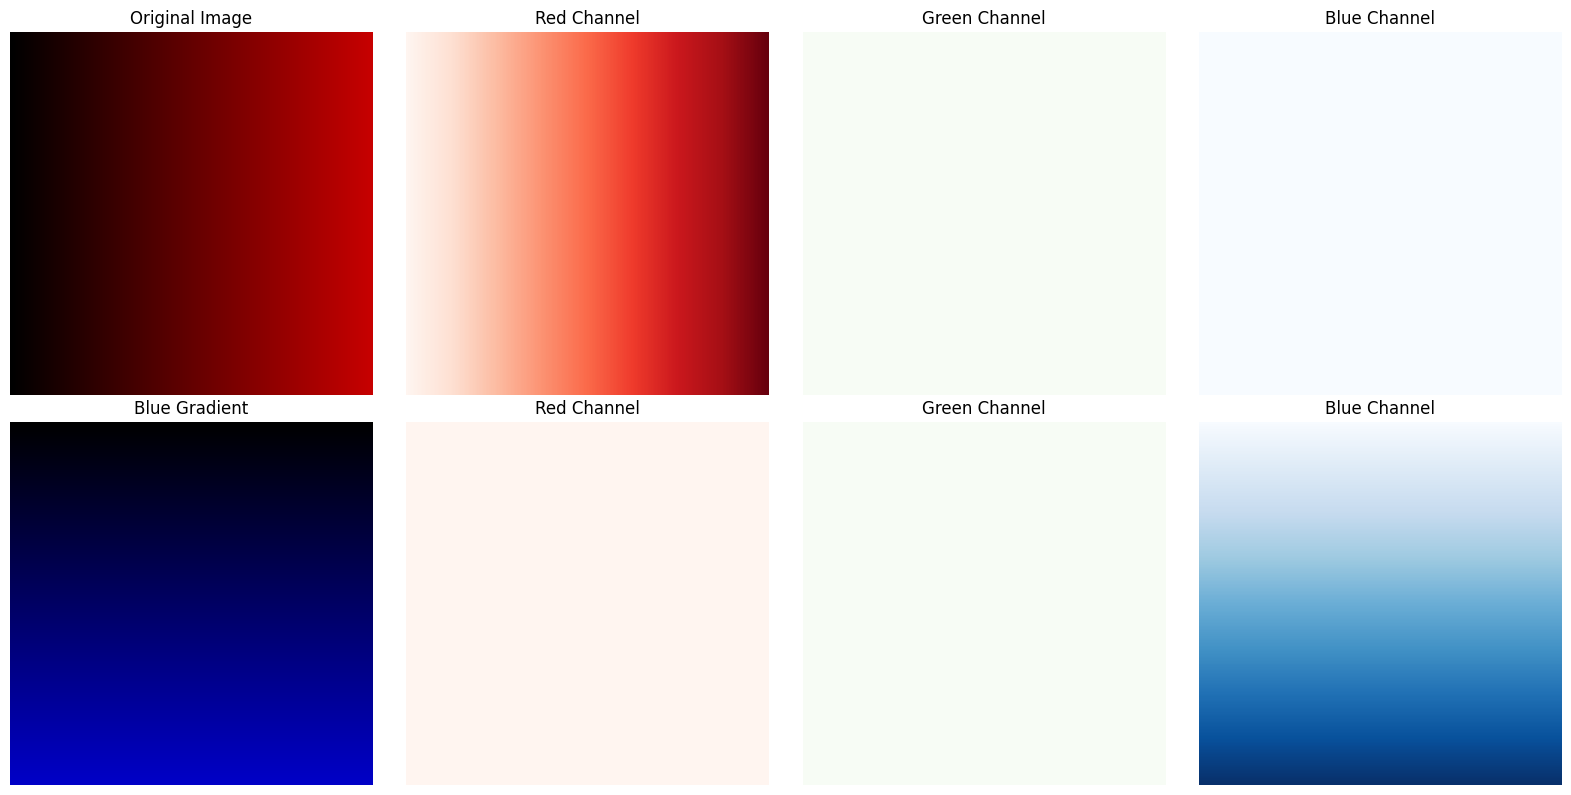

In [38]:
# Visualise individual colour channels
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original image
axes[0, 0].imshow(pil_array)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Red channel
axes[0, 1].imshow(pil_array[:, :, 0], cmap='Reds')
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

# Green channel
axes[0, 2].imshow(pil_array[:, :, 1], cmap='Greens')
axes[0, 2].set_title('Green Channel')
axes[0, 2].axis('off')

# Blue channel
axes[0, 3].imshow(pil_array[:, :, 2], cmap='Blues')
axes[0, 3].set_title('Blue Channel')
axes[0, 3].axis('off')

# Do the same for blue gradient
blue_array = np.array(Image.open('blue_gradient.png'))

axes[1, 0].imshow(blue_array)
axes[1, 0].set_title('Blue Gradient')
axes[1, 0].axis('off')

axes[1, 1].imshow(blue_array[:, :, 0], cmap='Reds')
axes[1, 1].set_title('Red Channel')
axes[1, 1].axis('off')

axes[1, 2].imshow(blue_array[:, :, 1], cmap='Greens')
axes[1, 2].set_title('Green Channel')
axes[1, 2].axis('off')

axes[1, 3].imshow(blue_array[:, :, 2], cmap='Blues')
axes[1, 3].set_title('Blue Channel')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

## Exercise Pixel exploration

In [39]:
# 1. Access and print the pixel values at position (100, 100) in red_gradient.png
# 2. What do you expect the RGB values to be? Check if you're right!
# 3. Extract just the red channel and find its maximum value
# Your code here:

# Load red_gradient.png for exploration
red_img = np.array(Image.open('red_gradient.png'))

# Get pixel at position (100, 100)
pixel_at_100_100 = red_img[100, 100]
print(f"Pixel at (100, 100): {pixel_at_100_100}")

# The red channel increases from left to right, so at column 100:
# R should be ~100, G and B should be 0
print(f"Expected: R≈100, G=0, B=0")

# Extract red channel and find maximum
red_channel = red_img[:, :, 0]
max_red = red_channel.max()
print(f"\nRed channel max value: {max_red}")
print(f"Red channel shape: {red_channel.shape}")


Pixel at (100, 100): [100   0   0]
Expected: R≈100, G=0, B=0

Red channel max value: 199
Red channel shape: (200, 200)


## Exercise Channel Manipulation

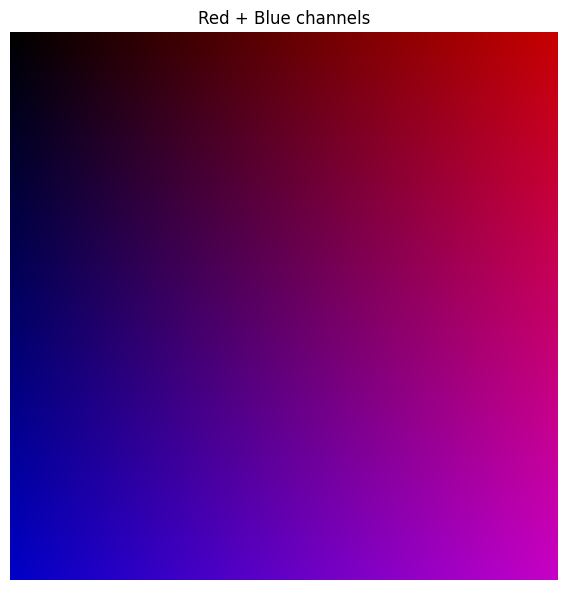

In [40]:
# Create a new image where:
# - Red channel comes from red_gradient.png
# - Blue channel comes from blue_gradient.png
# - Green channel is all zeros
# Display the result - what colour do you expect?
# Load the gradient images
red_grad = np.array(Image.open('red_gradient.png'))
blue_grad = np.array(Image.open('blue_gradient.png'))

# Create new image with R from red gradient, B from blue gradient, G = 0
new_image = np.zeros_like(red_grad)
new_image[:, :, 0] = red_grad[:, :, 0]  # Red channel from red_gradient
new_image[:, :, 2] = blue_grad[:, :, 2]  # Blue channel from blue_gradient
# Green channel stays 0

# Convert to uint8 and display
new_image = new_image.astype(np.uint8)
plt.figure(figsize=(8, 6))
plt.imshow(new_image)
plt.title('Red + Blue channels')
plt.axis('off')
plt.tight_layout()
plt.show()

### 3.4 Normalisation: Converting from [0, 255] to [0, 1]

Most machine learning models expect pixel values in [0, 1] rather than [0, 255]:

Original range:
Min: 0, Max: 199, Dtype: uint8

After dividing by 255:
Min: 0.000, Max: 0.780, Dtype: float64

Using sklearn MinMaxScaler:
Min: 0.000, Max: 1.000


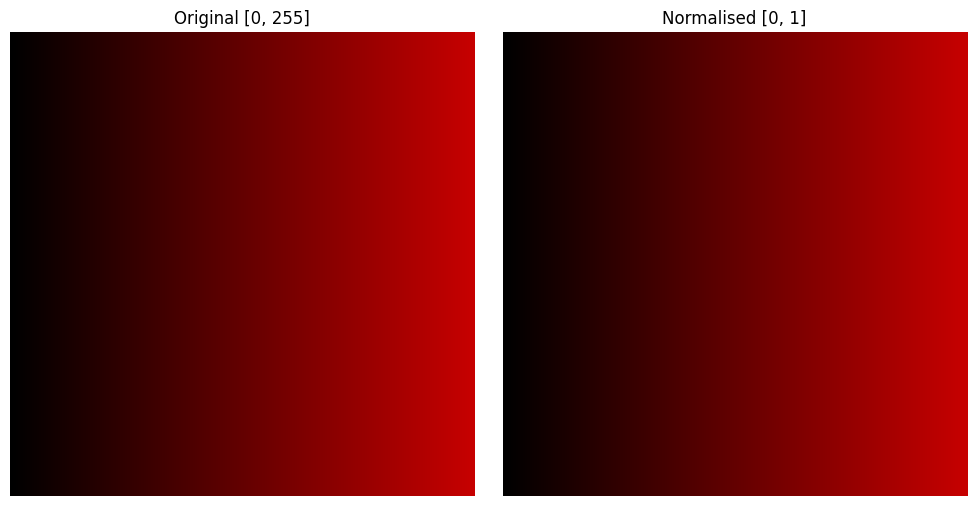


Note: Both images look identical because matplotlib handles both ranges!


In [41]:
# Original image (0-255)
img_255 = np.array(Image.open('red_gradient.png'))
print("Original range:")
print(f"Min: {img_255.min()}, Max: {img_255.max()}, Dtype: {img_255.dtype}")

# Method 1: Simple division
img_01 = img_255 / 255.0
print("\nAfter dividing by 255:")
print(f"Min: {img_01.min():.3f}, Max: {img_01.max():.3f}, Dtype: {img_01.dtype}")

# Method 2: Using sklearn (useful for other normalisations too)
from sklearn.preprocessing import MinMaxScaler

# Reshape for sklearn (it expects 2D)
img_flat = img_255.reshape(-1, 3)
scaler = MinMaxScaler()
img_scaled_flat = scaler.fit_transform(img_flat)
img_scaled = img_scaled_flat.reshape(img_255.shape)

print("\nUsing sklearn MinMaxScaler:")
print(f"Min: {img_scaled.min():.3f}, Max: {img_scaled.max():.3f}")

# Display both
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_255)
axes[0].set_title('Original [0, 255]')
axes[0].axis('off')

axes[1].imshow(img_01)
axes[1].set_title('Normalised [0, 1]')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\nNote: Both images look identical because matplotlib handles both ranges!")

### 3.5 Image Manipulations

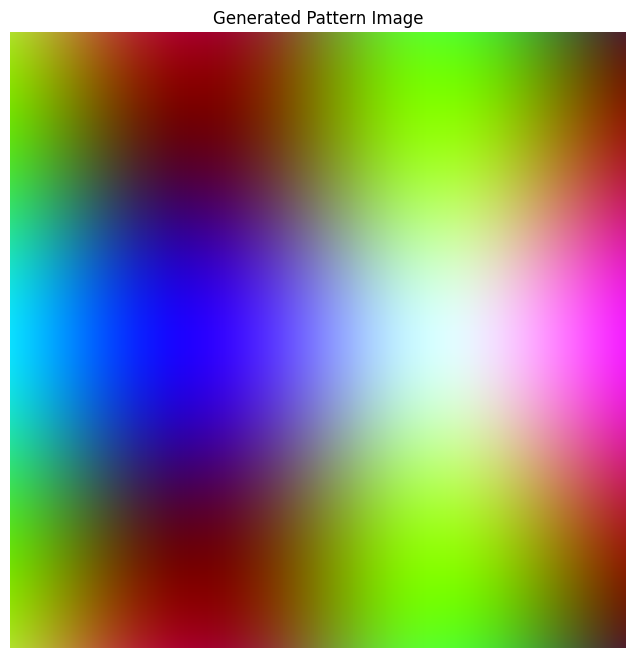

In [42]:
# Create a more interesting image
height, width = 300, 300
x, y = np.meshgrid(np.linspace(-2, 2, width), np.linspace(-2, 2, height))

# Create RGB channels with different patterns
r = (np.sin(x) * np.cos(y) + 1) / 2
g = (np.sin(x * 2) + 1) / 2
b = (np.cos(y * 2) + 1) / 2

pattern_img = np.dstack([r, g, b])
pattern_img = (pattern_img * 255).astype(np.uint8)

# Save it
Image.fromarray(pattern_img).save('pattern.png')

# Display
plt.figure(figsize=(8, 8))
plt.imshow(pattern_img)
plt.title('Generated Pattern Image')
plt.axis('off')
plt.show()

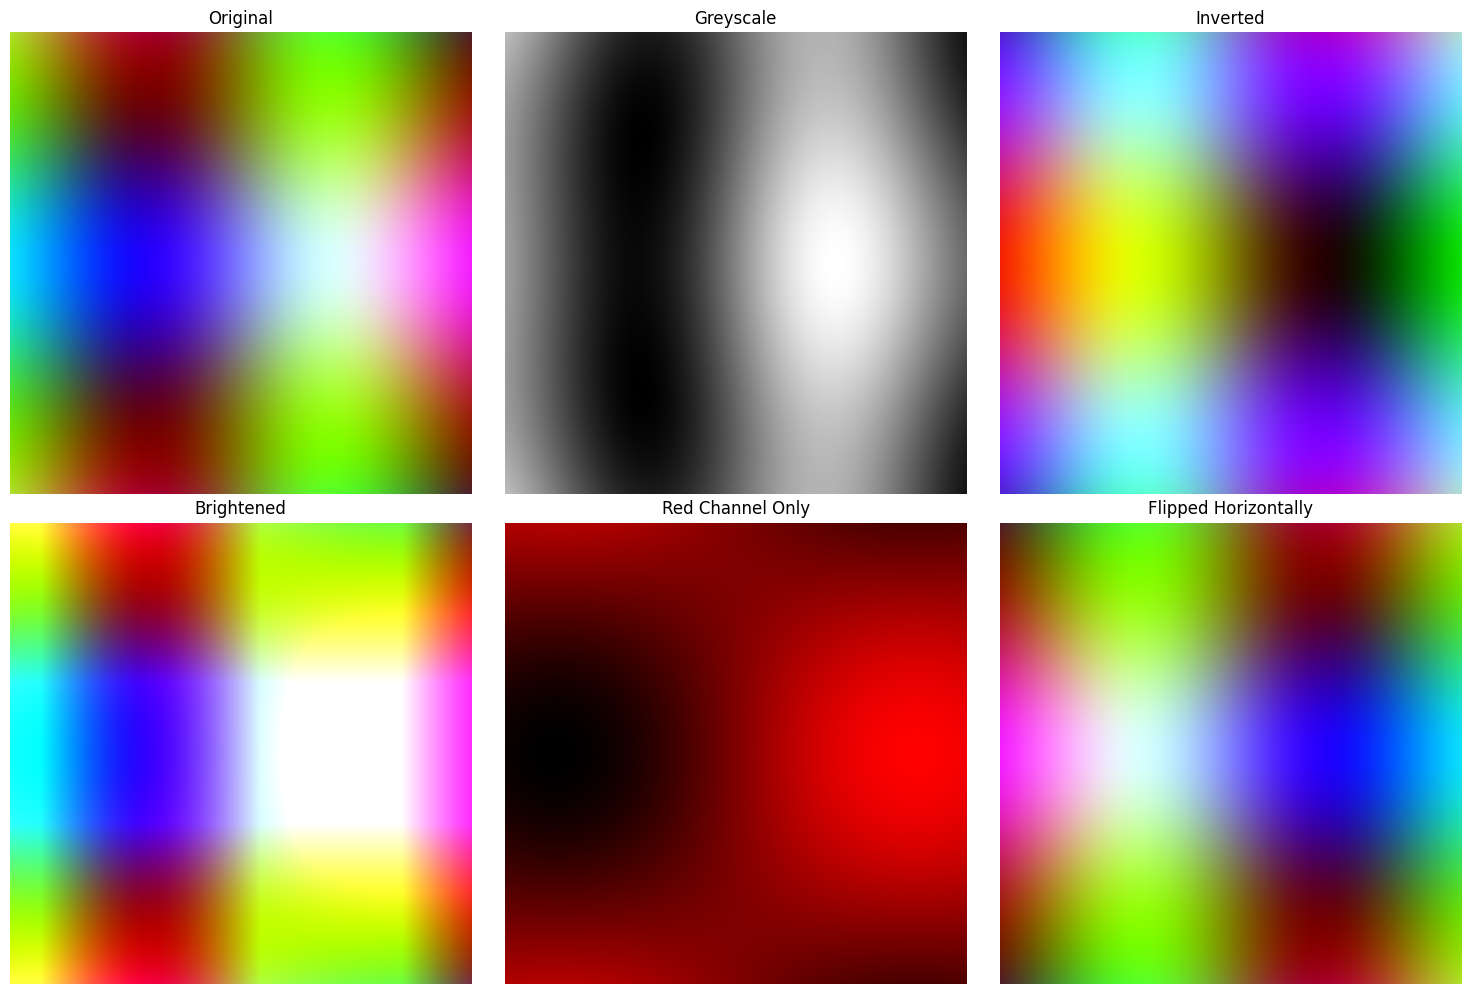

In [43]:
# Various transformations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original
axes[0, 0].imshow(pattern_img)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# Grayscale (using luminosity method)
gray = 0.299 * pattern_img[:, :, 0] + \
       0.587 * pattern_img[:, :, 1] + \
       0.114 * pattern_img[:, :, 2]
axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Greyscale')
axes[0, 1].axis('off')

# Inverted
inverted = 255 - pattern_img
axes[0, 2].imshow(inverted)
axes[0, 2].set_title('Inverted')
axes[0, 2].axis('off')

# Brightened
brightened = np.clip(pattern_img * 1.5, 0, 255).astype(np.uint8)
axes[1, 0].imshow(brightened)
axes[1, 0].set_title('Brightened')
axes[1, 0].axis('off')

# Only red channel
red_only = pattern_img.copy()
red_only[:, :, 1] = 0  # Remove green
red_only[:, :, 2] = 0  # Remove blue
axes[1, 1].imshow(red_only)
axes[1, 1].set_title('Red Channel Only')
axes[1, 1].axis('off')

# Flipped
flipped = np.fliplr(pattern_img)
axes[1, 2].imshow(flipped)
axes[1, 2].set_title('Flipped Horizontally')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## Exercise Create Your Own Transformations

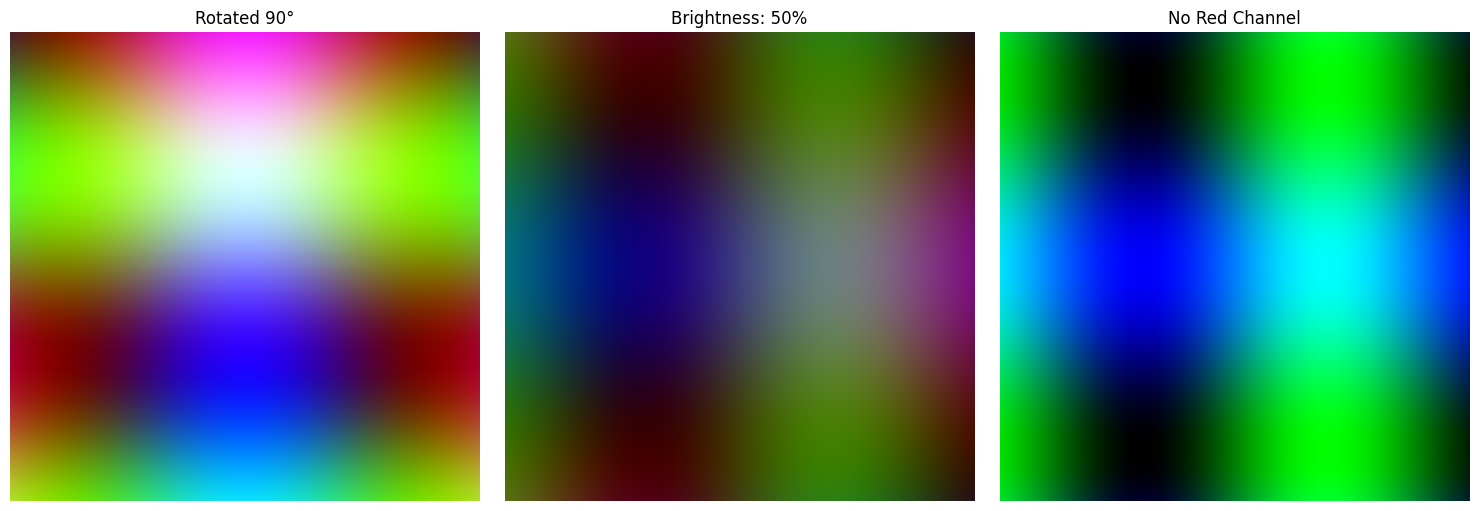

In [44]:
# Using pattern.png, create the following:
# 1. A version that's rotated 90 degrees (hint: use np.rot90)
# 2. A version with reduced brightness (multiply by 0.5)
# 3. A version with only the green and blue channels (remove red)
# 4. Display all three in a subplot
# Load pattern.png
pattern = np.array(Image.open('pattern.png'))

# 1. Rotate 90 degrees
rotated = np.rot90(pattern)

# 2. Reduce brightness by 50%
dim = (pattern * 0.5).astype(np.uint8)

# 3. Remove red channel (set to 0)
no_red = pattern.copy()
no_red[:, :, 0] = 0

# Display all three in subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(rotated)
axes[0].set_title('Rotated 90°')
axes[0].axis('off')

axes[1].imshow(dim)
axes[1].set_title('Brightness: 50%')
axes[1].axis('off')

axes[2].imshow(no_red)
axes[2].set_title('No Red Channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Exercise Create A Filter Challenge

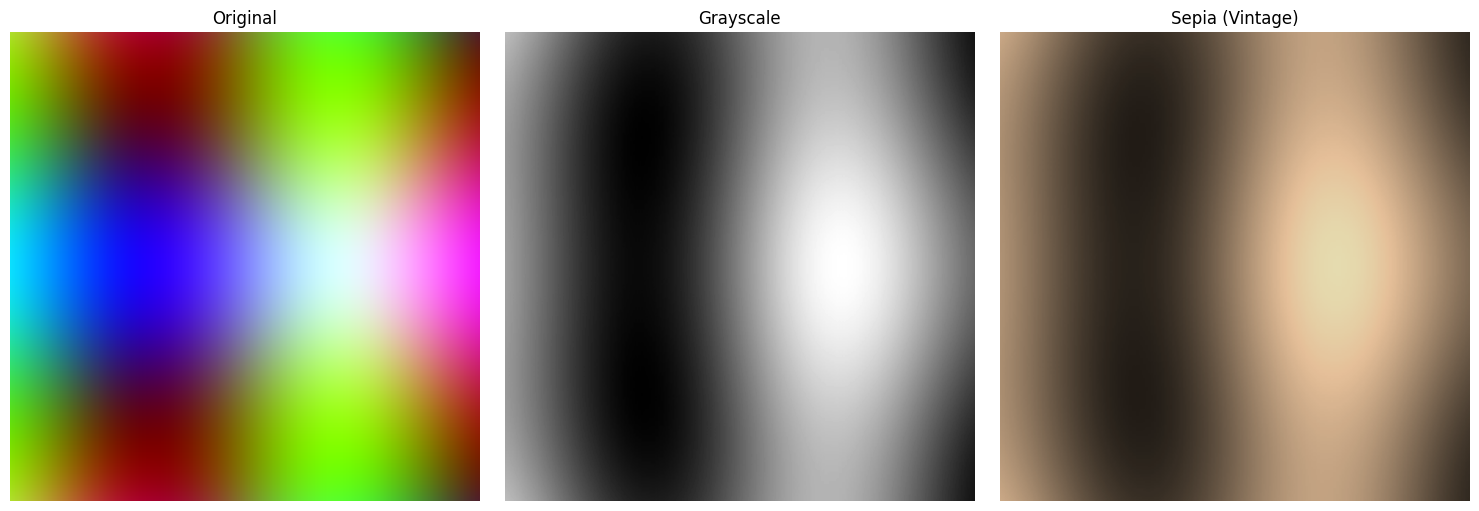

In [45]:
# Create a simple "vintage" filter for pattern.png:
# 1. Convert to grayscale using the luminosity method
# 2. Add a sepia tone by creating an RGB image where:
#    R = gray * 1.2, G = gray * 1.0, B = gray * 0.8
# 3. Reduce the overall brightness by 10%
# 4. Display original, grayscale, and sepia versions
# Your code here:

# Load the original image
pattern = np.array(Image.open('pattern.png'))

# Convert to grayscale using luminosity method: 0.299*R + 0.587*G + 0.114*B
gray = (0.299 * pattern[:, :, 0] + 
        0.587 * pattern[:, :, 1] + 
        0.114 * pattern[:, :, 2]).astype(np.uint8)

# Create sepia version by applying color tint to grayscale
sepia = np.zeros_like(pattern)
sepia[:, :, 0] = np.clip(gray * 1.2, 0, 255).astype(np.uint8)  # Red channel
sepia[:, :, 1] = gray  # Green channel (1.0 multiplier)
sepia[:, :, 2] = np.clip(gray * 0.8, 0, 255).astype(np.uint8)  # Blue channel

# Reduce overall brightness by 10% (multiply by 0.9)
sepia_dimmed = (sepia * 0.9).astype(np.uint8)

# Display all three versions in a subplot grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(pattern)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

axes[2].imshow(sepia_dimmed)
axes[2].set_title('Sepia (Vintage)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Exercise Use the dog image

Using 353.jpg, try the vintage filter and try rotating the image

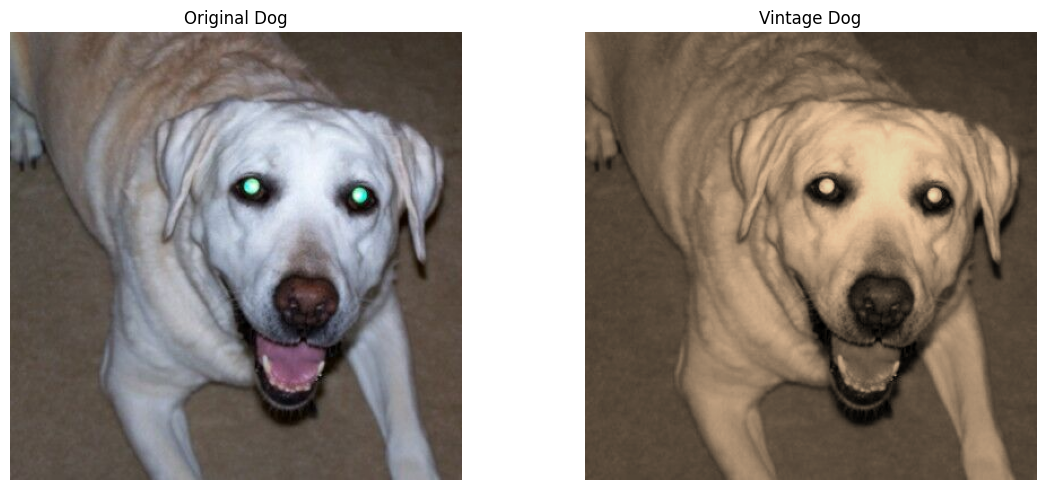

In [46]:
# Apply vintage filter

# Load the dog image
img_dog_array_fresh = np.array(Image.open('353.jpg'))

# Convert to grayscale using luminosity method
gray_dog = (0.299 * img_dog_array_fresh[:, :, 0] + 
            0.587 * img_dog_array_fresh[:, :, 1] + 
            0.114 * img_dog_array_fresh[:, :, 2]).astype(np.uint8)

# Create sepia version
sepia_dog = np.zeros_like(img_dog_array_fresh)
sepia_dog[:, :, 0] = np.clip(gray_dog * 1.2, 0, 255).astype(np.uint8)  # Red
sepia_dog[:, :, 1] = gray_dog  # Green
sepia_dog[:, :, 2] = np.clip(gray_dog * 0.8, 0, 255).astype(np.uint8)  # Blue

# Reduce brightness by 10%
sepia_dog_dimmed = (sepia_dog * 0.9).astype(np.uint8)

# Display original and vintage versions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img_dog_array_fresh)
axes[0].set_title('Original Dog')
axes[0].axis('off')

axes[1].imshow(sepia_dog_dimmed)
axes[1].set_title('Vintage Dog')
axes[1].axis('off')

plt.tight_layout()
plt.show()

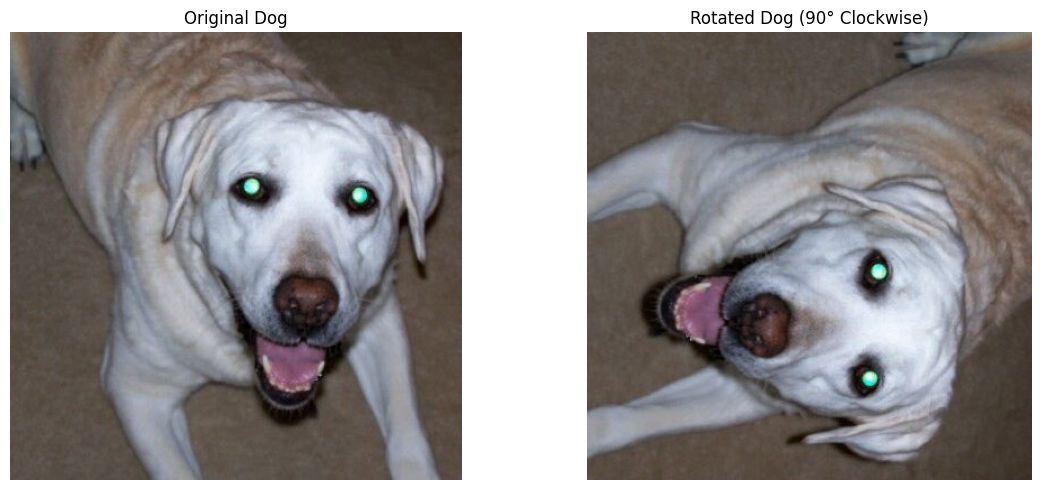

In [47]:
# Rotate

# Rotate the dog image 90 degrees clockwise
rotated_dog = np.rot90(img_dog_array_fresh, k=-1)

# Display original and rotated versions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img_dog_array_fresh)
axes[0].set_title('Original Dog')
axes[0].axis('off')

axes[1].imshow(rotated_dog)
axes[1].set_title('Rotated Dog (90° Clockwise)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

---
## Part 4: Introduction to Scikit-learn

Scikit-learn is the primary machine learning library in Python. Let's get familiar with its workflow:

### 4.1 The Scikit-learn Workflow

All scikit-learn models follow the same pattern:
1. **Import** the model class
2. **Instantiate** the model (possibly with hyperparameters)
3. **Fit** the model to training data
4. **Predict** on new data
5. **Evaluate** the model's performance

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
X = df[["age", "grade"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

kmeans.labels_

[[-1.34164079 -1.31639507]
 [ 0.4472136  -0.45920758]
 [-0.4472136   0.3979799 ]
 [ 1.34164079  1.37762274]]


array([0, 0, 0, 1], dtype=int32)

## Let's plot those clusters

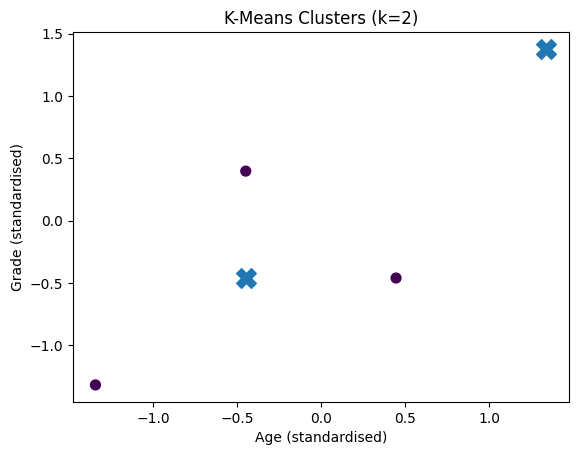

In [50]:
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=kmeans.labels_,
    s=50
)

# Plot cluster centres
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=200,
    marker='X'
)

plt.xlabel("Age (standardised)")
plt.ylabel("Grade (standardised)")
plt.title("K-Means Clusters (k=2)")
plt.show()

## What if we didn't scale? 
Why is scaling important?

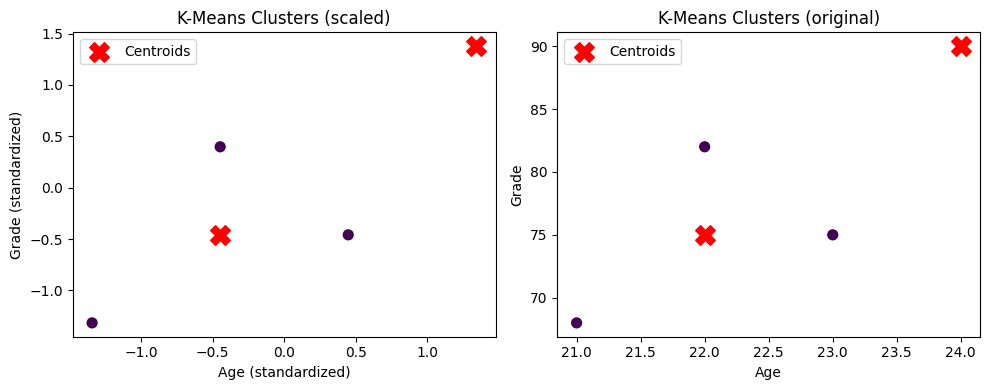

In [51]:
plt.figure(figsize=(10, 4))

# Get cluster labels from kmeans model
labels = kmeans.labels_

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='X', c='red', label='Centroids')
plt.xlabel("Age (standardized)")
plt.ylabel("Grade (standardized)")
plt.title("K-Means Clusters (scaled)")
plt.legend()

# Scatter plot in original units
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.subplot(1, 2, 2)
plt.scatter(df["age"], df["grade"], c=labels, s=50, cmap='viridis')
plt.scatter(centers_original[:, 0], centers_original[:, 1],
            s=200, marker='X', c='red', label='Centroids')
plt.xlabel("Age")
plt.ylabel("Grade")
plt.title("K-Means Clusters (original)")
plt.legend()

plt.tight_layout()
plt.show()

In [52]:
# Let's predict science scores from maths scores
X = students_df[['math_score', 'attendance']]  # Features (2D array)
y = students_df['science_score']  # Target (1D array)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Feature matrix shape: (10, 2)
Target vector shape: (10,)

Training samples: 7
Testing samples: 3


In [53]:
# 1. Import (already done above)
# 2. Instantiate
model = LinearRegression()

# 3. Fit
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

# Show predictions vs actual
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred.round(1),
    'Difference': (y_test.values - y_pred).round(1)
})
print("\nPredictions vs Actual:")
print(comparison)

Model Performance:
Mean Squared Error: 25.70
R² Score: -0.896

Predictions vs Actual:
   Actual  Predicted  Difference
0      94       88.3         5.7
1      85       78.4         6.6
2      89       89.9        -0.9


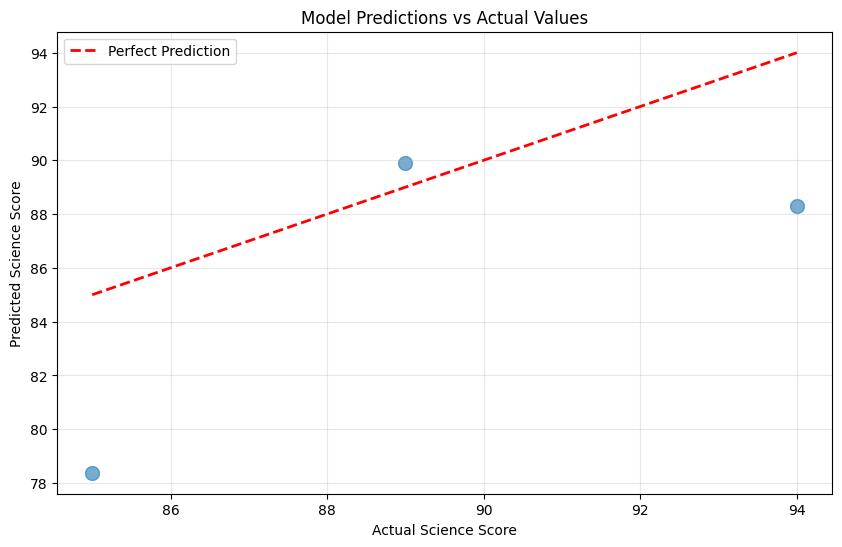


Model Parameters:
Coefficients: [0.25778363 0.55777372]
Intercept: 11.29

Interpretation:
Science Score = 11.3 + 0.26 * Maths + 0.56 * Attendance


In [54]:
# Visualise predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=100)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Science Score')
plt.ylabel('Predicted Science Score')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Model coefficients
print("\nModel Parameters:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"\nInterpretation:")
print(f"Science Score = {model.intercept_:.1f} + " 
      f"{model.coef_[0]:.2f} * Maths + {model.coef_[1]:.2f} * Attendance")

### 4.2 Classification Example

Let's create a simple classification task:

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a binary classification task: High vs Low performer
# High performer: average score > 85
students_df['performance'] = (students_df['average_score'] > 85).astype(int)

print("Class distribution:")
print(students_df['performance'].value_counts())

# Features and target
X_class = students_df[['math_score', 'attendance']]
y_class = students_df['performance']

# Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)

# Train classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train_c, y_train_c)

# Predict
y_pred_c = clf.predict(X_test_c)

# Evaluate
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"\nAccuracy: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c, 
                          target_names=['Low Performer', 'High Performer']))

Class distribution:
performance
0    6
1    4
Name: count, dtype: int64

Accuracy: 100.00%

Classification Report:
                precision    recall  f1-score   support

 Low Performer       1.00      1.00      1.00         1
High Performer       1.00      1.00      1.00         2

      accuracy                           1.00         3
     macro avg       1.00      1.00      1.00         3
  weighted avg       1.00      1.00      1.00         3



### 4.3 Working with Image Data in Sklearn

Let's use our images with sklearn:

Reshaped to: (90000, 3)
Each row is one pixel's RGB values


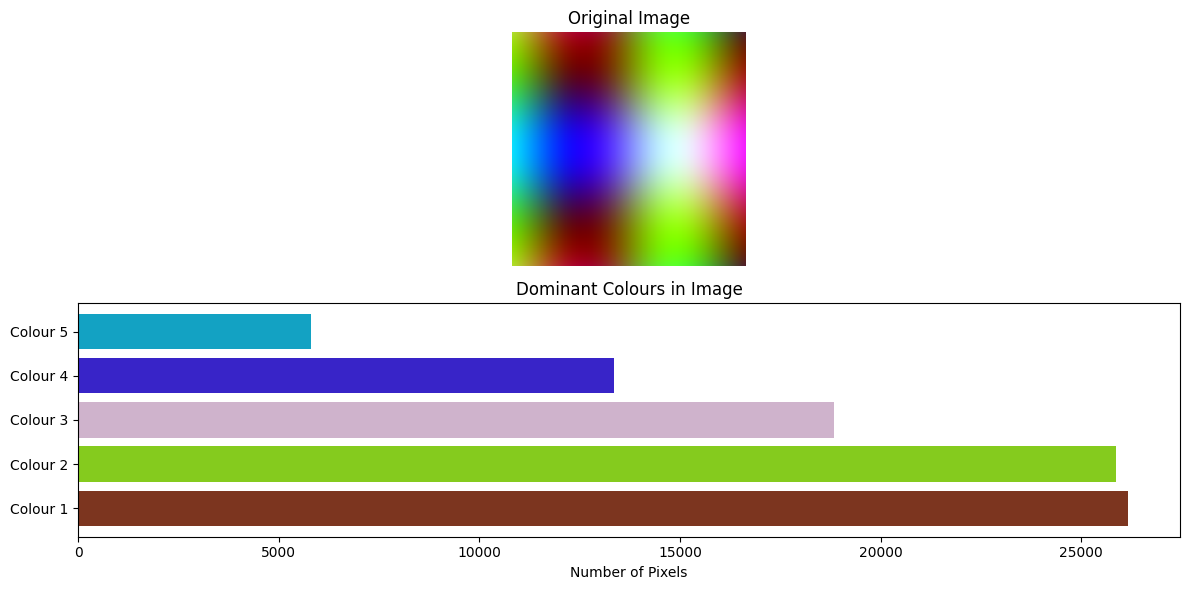


Dominant colours (RGB in [0,1]):
1. RGB: [0.48488653 0.20663334 0.12147024] - 26,156 pixels (29.1%)
2. RGB: [0.52234009 0.79535396 0.11955828] - 25,864 pixels (28.7%)
3. RGB: [0.81009879 0.70330976 0.79924867] - 18,830 pixels (20.9%)
4. RGB: [0.22053699 0.14292494 0.78532216] - 13,352 pixels (14.8%)
5. RGB: [0.07418492 0.63661665 0.76654416] - 5,798 pixels (6.4%)


In [56]:
from sklearn.cluster import KMeans

# Load our pattern image
img = np.array(Image.open('pattern.png'))

# Reshape image to 2D array (pixels x channels)
pixels = img.reshape(-1, 3)
print(f"Reshaped to: {pixels.shape}")
print(f"Each row is one pixel's RGB values")

# Normalise to [0, 1]
pixels_norm = pixels / 255.0

# Use K-Means to find dominant colours
n_colours = 5
kmeans = KMeans(n_clusters=n_colours, random_state=42, n_init=10)
kmeans.fit(pixels_norm)

# Get the dominant colours
colours = kmeans.cluster_centers_
colour_counts = np.bincount(kmeans.labels_)

# Sort by frequency
sorted_indices = np.argsort(colour_counts)[::-1]
colours_sorted = colours[sorted_indices]
counts_sorted = colour_counts[sorted_indices]

# Display dominant colours
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Original image
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Dominant colours
axes[1].barh(range(n_colours), counts_sorted, 
             color=[colours_sorted[i] for i in range(n_colours)])
axes[1].set_yticks(range(n_colours))
axes[1].set_yticklabels([f'Colour {i+1}' for i in range(n_colours)])
axes[1].set_xlabel('Number of Pixels')
axes[1].set_title('Dominant Colours in Image')

plt.tight_layout()
plt.show()

print("\nDominant colours (RGB in [0,1]):")
for i, (colour, count) in enumerate(zip(colours_sorted, counts_sorted)):
    pct = count/pixels.shape[0]*100
    print(f"{i+1}. RGB: {colour} - {count:,} pixels ({pct:.1f}%)")

---
## Part 5: Putting It All Together - Mini Challenge

Now it's your turn! Complete the following challenges to test your understanding:

### Challenge 1: Data Analysis
1. Load the weather.json file
2. Calculate the "comfort index" as: `comfort = temperature * (100 - humidity) / wind_speed`
3. Find which city has the highest comfort index
4. Create a visualisation showing comfort index by city

### Challenge 2: Image Processing
1. Load the pattern.png image
2. Create a version with only blue and green channels (no red)
3. Normalise it to [0, 1]
4. Display the original and modified images side by side

### Challenge 3: Sklearn Practice
1. Using the students data, predict `attendance` from `math_score` and `science_score`
2. Split the data 70/30 train/test
3. Train a model and calculate the R² score
4. Visualise predicted vs actual attendance

**Starter code below:**

City with highest comfort index: Dublin (23.61)

Comfort index for all cities:
       city  comfort_index
2    Dublin      23.609756
3      Cork      19.574468
0  Limerick      14.802632
1    Galway       9.567568
4   Belfast       6.443350


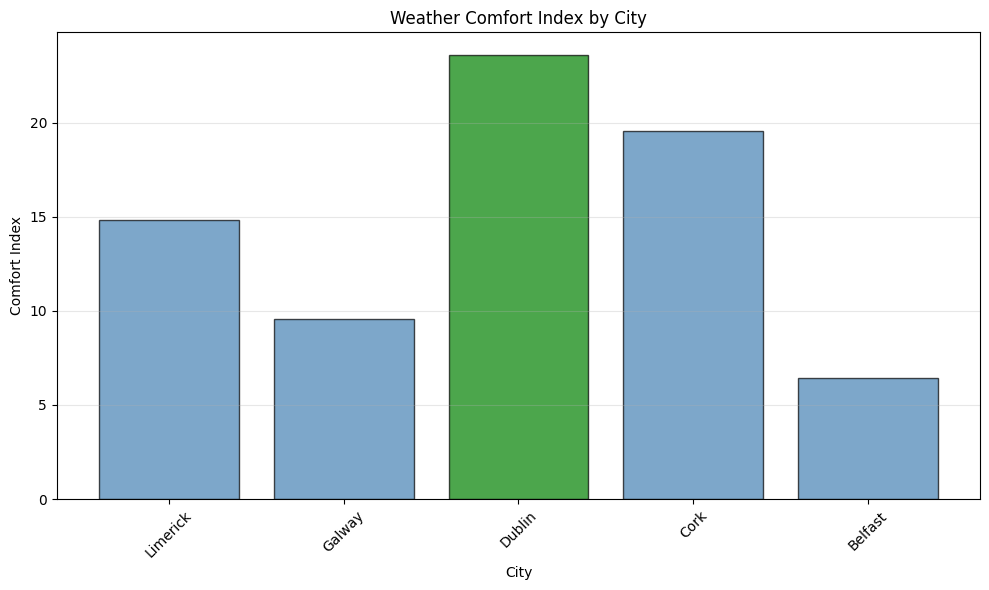

In [57]:
# Challenge 1: Data Analysis
# Your code here

# Calculate the comfort index: comfort = temperature * (100 - humidity) / wind_speed
weather_merged['comfort_index'] = (weather_merged['temperature'] * 
                                   (100 - weather_merged['humidity']) / 
                                   weather_merged['wind_speed'])

# Find the city with the highest comfort index
best_city_idx = weather_merged['comfort_index'].idxmax()
best_city = weather_merged.loc[best_city_idx, 'city']
best_comfort = weather_merged.loc[best_city_idx, 'comfort_index']

print(f"City with highest comfort index: {best_city} ({best_comfort:.2f})")
print("\nComfort index for all cities:")
print(weather_merged[['city', 'comfort_index']].sort_values('comfort_index', ascending=False))

# Visualisation: comfort index by city
plt.figure(figsize=(10, 6))
colors = ['green' if city == best_city else 'steelblue' for city in weather_merged['city']]
plt.bar(weather_merged['city'], weather_merged['comfort_index'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('City')
plt.ylabel('Comfort Index')
plt.title('Weather Comfort Index by City')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
# Challenge 2: Image Processing  
# Your code here


In [59]:
# Challenge 3: Sklearn Practice
# Your code here


---
## Summary and Key Takeaways

### Pandas
- `pd.read_csv()` and `pd.read_json()` for loading data
- `df.head()`, `df.describe()`, `df.info()` for exploration
- `df.fillna()` and `df.dropna()` for handling missing data
- `df.groupby()` for aggregations
- `pd.merge()` for combining dataframes

### Matplotlib
- `plt.plot()` for line plots
- `plt.bar()` for bar charts
- `plt.scatter()` for scatter plots
- `plt.hist()` for histograms
- `plt.imshow()` for images
- Always use `plt.tight_layout()` for better spacing

### Images
- Images are numpy arrays with shape (height, width, channels)
- PIL uses RGB, OpenCV uses BGR
- Normalise from [0, 255] to [0, 1] by dividing by 255
- Use `cv2.cvtColor()` to convert colour spaces

### Scikit-learn
- All models follow: import → instantiate → fit → predict → evaluate
- `train_test_split()` to split data
- Different metrics for regression (MSE, R²) vs classification (accuracy, F1)
- Models have `.fit()`, `.predict()`, and `.score()` methods

---
## Next Steps

In the next lab, we'll start building actual machine learning models for regression tasks!

**Resources:**
- Pandas documentation: https://pandas.pydata.org/docs/
- Matplotlib gallery: https://matplotlib.org/stable/gallery/
- Scikit-learn tutorials: https://scikit-learn.org/stable/tutorial/
- OpenCV tutorials: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

**Optional Practice:**
1. Try loading your own CSV files
2. Create more complex visualisations
3. Experiment with different sklearn models (see documentation)
4. Process your own images